<a href="https://colab.research.google.com/github/deepu-san/DataScience/blob/main/Assignment5_6_7_Deepu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df = df.reindex(columns=['Ground Temperature', 'Chirps/Second'])
df.head()

,Ground Temperature,Chirps/Second
0,88.6,20.0
1,71.6,16.0
2,93.3,19.8
3,84.3,18.4
4,80.6,17.1


In [ ]:
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values
#y=df["Chirps/Second"]

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

Find the linear regression equation for this data.

In [ ]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 
regressor.fit(X_train,y_train) 

m=regressor.coef_[0]
c=regressor.intercept_
print("Linear Regression Equation: y = {} * x + {}".format(m,c))
y_pred = regressor.predict(X_test)

Linear Regression Equation: y = 0.1935362906148277 * x + 1.1677318720240901


Chart the original data and the equation on the chart.

Text(0, 0.5, 'Chirps/second')

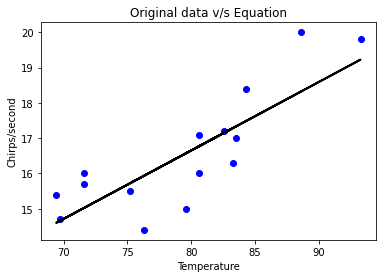

In [ ]:
plt.scatter(X,y, color="blue")
plt.plot(X, regressor.predict(X), color="black", linewidth=2)
plt.title("Original data v/s Equation")
plt.xlabel('Temperature')
plt.ylabel('Chirps/second')

Find the equation's  R2  score

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7986678171941262


If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
print("Predicted Chirping rate at temp=95 : ",regressor.predict([[95]]))

Predicted Chirping rate at temp=95 :  [19.55367948]


you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [ ]:
print("approximate ground temperature when the crickets were chirping at a rate of 18 chirps per second :", (18-c)/m)

approximate ground temperature when the crickets were chirping at a rate of 18 chirps per second : 86.97215428952896


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [31]:
df = pd.read_fwf("brain_body.txt")

In [4]:
df.head(4)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0


In [32]:
df = df.reindex(columns=['Body', 'Brain'])
df.head(4)

,Body,Brain
0,44.5,3.385
1,15.5,0.480
2,8.1,1.350
3,423.0,465.000


In [5]:
df.shape

(62, 2)

Capping Outliers: 

In [ ]:
# q1 = df['Brain'].quantile(0.25)
# q3 = df['Brain'].quantile(0.75)
# iqr = q3-q1
# upr_lim = q3 + 1.5*iqr

# df["Brain"]=df['Brain'].where(df['Brain'] <= upr_lim, upr_lim) 

# q1 = df['Body'].quantile(0.25)
# q3 = df['Body'].quantile(0.75)
# iqr = q3-q1
# upr_lim = q3 + 1.5*iqr

# df["Body"]=df['Body'].where(df['Body'] <= upr_lim, upr_lim) 


# df

The regression was done with the outliers removed, but the model ended up with very poor  $R^2$ Score. Hence the outliers were kept as it was.

In [33]:
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)


#TASK1
Find the linear regression equation for this data for brain weight to body weight.

In [34]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 
regressor.fit(X_train,y_train) 

m=regressor.coef_[0]
c=regressor.intercept_
print("Linear Regression Equation: y = {} * x + {}".format(m,c))
y_pred = regressor.predict(X_test)

Linear Regression Equation: y = 0.9077309888393783 * x + -74.54110554957035


#Task2
Chart the original data and the equation on the chart.

Text(0, 0.5, 'Body')

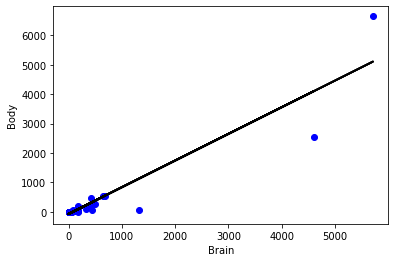

In [36]:
plt.scatter(X,y, color="blue")
plt.plot(X, regressor.predict(X), color="black", linewidth=2)
plt.xlabel('Brain')
plt.ylabel('Body')

#Task 3
Find the equation's $R^2$ score

In [35]:
from sklearn import metrics 
print('R2-SCORE:', metrics.r2_score(y_test,y_pred))

R2-SCORE: 0.8328993412816281


Since the  $R^2$ score of the Model is greater than 0.8. We can conclude that the equation is a good fit for the data and there is a strong correlation between Body Weight and Brain weight in Mammals.

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [4]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [5]:
df.head(3)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200


In [6]:
df.shape

(52, 6)

#Task 1:
Find the linear regression equation for this data 
using columns 1-5 to column 6.

In [7]:
X = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3)

regressor1 = LinearRegression() 
regressor1.fit(X_train,y_train)

m=regressor1.coef_
c=regressor1.intercept_
#print("Linear Regression Equation: y = {} * x + {}".format(m,c))
print("The co-efficients and intercept for the equation :\n" ,*m,c)

y_pred = regressor1.predict(X_test)


The co-efficients and intercept for the equation :
 892.4576714065315 5435.346038707106 528.8280368485748 -1874.6052163565448 -197.59173964577803 12834.190740962145


In [52]:
from sklearn import metrics 
print('R2-SCORE while using features 1 to 5 is:', metrics.r2_score(y_test,y_pred))

R2-SCORE while using features 1 to 5 is: 0.8062575050136129


#Task 2
Find the selection of columns with the best  R2  score.

In [53]:
import itertools

features=["Sex", "Rank", "Year", "Degree", "YSdeg"]

#r2={}
max=0
l=[]

for feature in range(0, len(features)+1):
    for comb in itertools.combinations(features, feature): #Gives us all combination of features
        if (len(comb)>0): # To remove the combination which does not contain any features
            X=df[list(comb)]
            
            y= df.iloc[:,-1].values

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=5)

            regressor = LinearRegression() 
            regressor.fit(X_train,y_train)

            y_pred = regressor.predict(X_test)

            #r2[(comb)]=metrics.r2_score(y_test,y_pred)
            #print('R2-SCORE for',comb,"is :", metrics.r2_score(y_test,y_pred))

            if(metrics.r2_score(y_test,y_pred)>max):
                max=metrics.r2_score(y_test,y_pred)
                l=list(comb)


#print(r2)
print("The highest R2 score is for combinaton ",l,"with a score of ", max)                   

The highest R2 score is for combinaton  ['Rank', 'Year'] with a score of  0.8484717291510796


#Task 3
Report whether sex is a factor in salary.

Ans: Since the feature 'Sex' is not present in the combination of features which gives the best $R^2$ score, we can say that 'Sex' is not a factor in Salary. However this may not be true beacuse the combination of features which gives the best $R^2$ score depends on the train-test split and without using a 'random_state', the train-test split will yield us different combinations each time in which some may involve the feature 'Sex'. So to get a more clear picture, I have also plotted a box for Salary ditribution of Males(0) and females(1)  

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


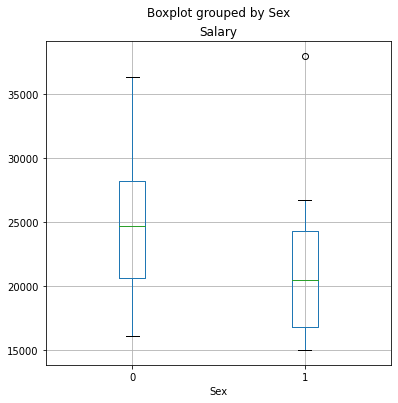

In [ ]:
boxplot = df.boxplot(column=["Salary"],by="Sex",figsize=(6,6))